In [414]:
from pandas_datareader import DataReader
from datetime import date, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [415]:
dic_moedas = {
    'Dólar Australiano': 'AUD=X',
    'Real': 'BRL=X',
    'Euro': 'EUR=X',
    'Peso (México)': 'MXN=X',
    'Peso (Argentina)': 'ARS=X',
    'Peso (Chile)': 'CLP=X',
    'Rublo (Rússia)': 'RUB=X',
    'Yuan (China)': 'CNY=X',
    'Iene (Japão)': 'JPY=X',
    'Libra (UK)': 'GBP=X',
    'Rand (Afr. Sul)': 'ZAR=X',
    'Rúpia (Índia)': 'INR=X',
    'Sol (Peru)': 'PEN=X',
    'Krone (Noruega)': 'NOK=X',
    'Guarany (Paraguai)': 'PYG=X',
    'Bitcoin': 'BTC=X'
}

In [416]:
def obtem_cotacao_moeda(nome_moeda, cod_moeda, fonte, ini, fim):
    df = DataReader(cod_moeda, data_source, start, end, )
    return df[['Adj Close']].rename(columns={'Adj Close': nome_moeda})

In [417]:
data_source = 'yahoo'
start = date(2014, 1, 1)
end = date(2020, 8, 7)

In [418]:
dfs = {}
for nome_moeda, cod_moeda in dic_moedas.items():
    dfs[nome_moeda] = obtem_cotacao_moeda(
        nome_moeda, cod_moeda, data_source, start, end
    )

In [419]:
def agrupa_dfs(dfs):
    df_unico = pd.concat(dfs.values(), axis='columns')
    return df_unico

In [420]:
dfa = agrupa_dfs(dfs)

In [421]:
cores = ['red', 'coral'] + ['blue' for _ in range(len(dic_moedas) - 2)]
str_datas = f'{start.strftime("%m/%y")} - {end.strftime("%m/%y")}'

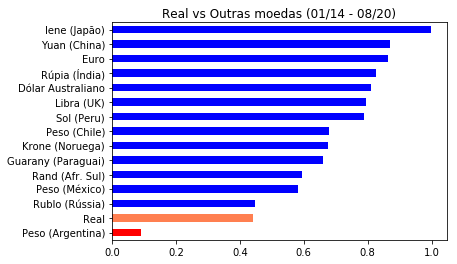

In [423]:
(dfa.iloc[0] / dfa.iloc[-1]).sort_values()[:-1].plot.barh(title=f'Real vs Outras moedas ({str_datas})', color=cores)
plt.show()